<a href="https://colab.research.google.com/github/jayV1999/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS_Jayanth_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import warnings
warnings.filterwarnings('ignore')

import re, string, unicodedata
import nltk
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from nltk.stem import PorterStemmer, LancasterStemmer

from yellowbrick.cluster import KElbowVisualizer
from wordcloud import WordCloud

import inflect
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from wordcloud import WordCloud, STOPWORDS

from sklearn.cluster import DBSCAN
from textblob import TextBlob

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
import plotly.express as px

from collections import Counter

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_1 = "/content/drive/MyDrive/Data Sets/Copy of Zomato Restaurant names and Metadata.csv"
path_2 = "/content/drive/MyDrive/Data Sets/Copy of Zomato Restaurant reviews.csv"

In [4]:
df_metadata = pd.read_csv(path_1)
df_reviews = pd.read_csv(path_2)

In [5]:
df_metadata.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
df_reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [7]:
#Working on the metadata of zomato and its restaurant names first
print(df_metadata.info())
print("----------------------------")
print("total Rows and Columns")
print(df_metadata.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB
None
----------------------------
total Rows and Columns
(105, 6)


In [8]:
df_metadata.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [9]:
#checking if there are any null values

df_metadata.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [10]:
#we tend to have missing values in some of the columns which must be treated

for col in list(df_metadata) :
  if((df_metadata[col].isnull().sum())/(len(df_metadata[col]))*100) > 50 :
    print('Feature with more than 50% of the observations are NULL values:',col)
#The columns which have 50% null values sshould be treated 

Feature with more than 50% of the observations are NULL values: Collections


In [11]:
# Dropping the 'Collections' feature
df_metadata.drop(columns = 'Collections',axis =1,inplace = True)

# Removing the observations with null values in 'Timings' feature
df_metadata.dropna(axis = 0,inplace = True)

# Print
print('Shape:',df_metadata.shape)
print("-------------------------")
print(df_metadata.info())

Shape: (104, 5)
-------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      104 non-null    object
 1   Links     104 non-null    object
 2   Cost      104 non-null    object
 3   Cuisines  104 non-null    object
 4   Timings   104 non-null    object
dtypes: object(5)
memory usage: 4.9+ KB
None


In [12]:
df_metadata.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [13]:
# Replacing empty space and comma in 'Cuisine' feature
df_metadata['Cuisines'] = df_metadata['Cuisines'].str.replace(' ','')
df_metadata['Cuisines'] = df_metadata['Cuisines'].str.replace(',',', ')


In [14]:
#Check out the unique set of cuisines
print(list(df_metadata['Cuisines'].unique()))

['Chinese, Continental, Kebab, European, SouthIndian, NorthIndian', 'Biryani, NorthIndian, Chinese', 'Asian, Mediterranean, NorthIndian, Desserts', 'Biryani, NorthIndian, Chinese, Seafood, Beverages', 'Asian, Continental, NorthIndian, Chinese, Mediterranean', 'Seafood, Goan, NorthIndian, Continental, Asian', 'HealthyFood, NorthIndian, Continental, SouthIndian', 'Lebanese', 'American, Chinese, NorthIndian, Kebab, SouthIndian', 'IceCream, Desserts', 'StreetFood, NorthIndian, FastFood', 'Mediterranean, NorthIndian, Kebab, BBQ', 'Continental, American, Chinese', 'NorthIndian, Italian, FingerFood', 'European, Mediterranean, NorthIndian', 'Burger, FastFood', 'NorthIndian', 'Chinese, NorthIndian', 'NorthIndian, Chinese, Continental', 'NorthIndian, Chinese, Biryani', 'NorthIndian, Japanese, Italian, Salad, Sushi', 'American', 'Continental', 'Mexican, Italian, NorthIndian, Chinese, Salad', 'NorthIndian, Mediterranean, European', 'Mughlai, Biryani', 'FastFood', 'Bakery, NorthIndian, Mughlai, Jui

In [15]:
# Spliting with 'comma' and empty space
cuisine_list = df_metadata.Cuisines.str.split(', ')
print(cuisine_list)

0      [Chinese, Continental, Kebab, European, SouthI...
1                        [Biryani, NorthIndian, Chinese]
2          [Asian, Mediterranean, NorthIndian, Desserts]
3      [Biryani, NorthIndian, Chinese, Seafood, Bever...
4      [Asian, Continental, NorthIndian, Chinese, Med...
                             ...                        
100                                    [FastFood, Salad]
101                                     [Bakery, Mithai]
102                      [NorthIndian, Biryani, Chinese]
103                                           [FastFood]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 104, dtype: object


In [16]:
# Top 10 Cuisines
clusterlist = {}
for names in cuisine_list:
    for name in names:
      # print(name)
      if (name in clusterlist):
        clusterlist[name]+=1
        # print(clusterlist)
      else:
         clusterlist[name]=1
# Create a cuis dataframe
cuis_df = pd.DataFrame(clusterlist.values(),index = clusterlist.keys(),columns = {'Cuisine count in Restaurants'}).reset_index()

# Sort the dataframe in descending order
cuis_df.sort_values(by = 'Cuisine count in Restaurants',ascending = False,inplace = True)

#Pick the 10 restaurant most nominated 
top_10_cuis = cuis_df[0:10]

print('The Top 10 Cuisines are:\n',top_10_cuis)
print(clusterlist)

The Top 10 Cuisines are:
           index  Cuisine count in Restaurants
5   NorthIndian                            60
0       Chinese                            43
1   Continental                            21
6       Biryani                            16
18     FastFood                            15
7         Asian                            15
20      Italian                            14
9      Desserts                            13
4   SouthIndian                             8
28       Bakery                             7
{'Chinese': 43, 'Continental': 21, 'Kebab': 6, 'European': 4, 'SouthIndian': 8, 'NorthIndian': 60, 'Biryani': 16, 'Asian': 15, 'Mediterranean': 5, 'Desserts': 13, 'Seafood': 4, 'Beverages': 5, 'Goan': 1, 'HealthyFood': 1, 'Lebanese': 1, 'American': 6, 'IceCream': 2, 'StreetFood': 2, 'FastFood': 15, 'BBQ': 2, 'Italian': 14, 'FingerFood': 2, 'Burger': 5, 'Japanese': 2, 'Salad': 5, 'Sushi': 4, 'Mexican': 1, 'Mughlai': 6, 'Bakery': 7, 'Juices': 1, 'Arabian': 2, 'Andhr

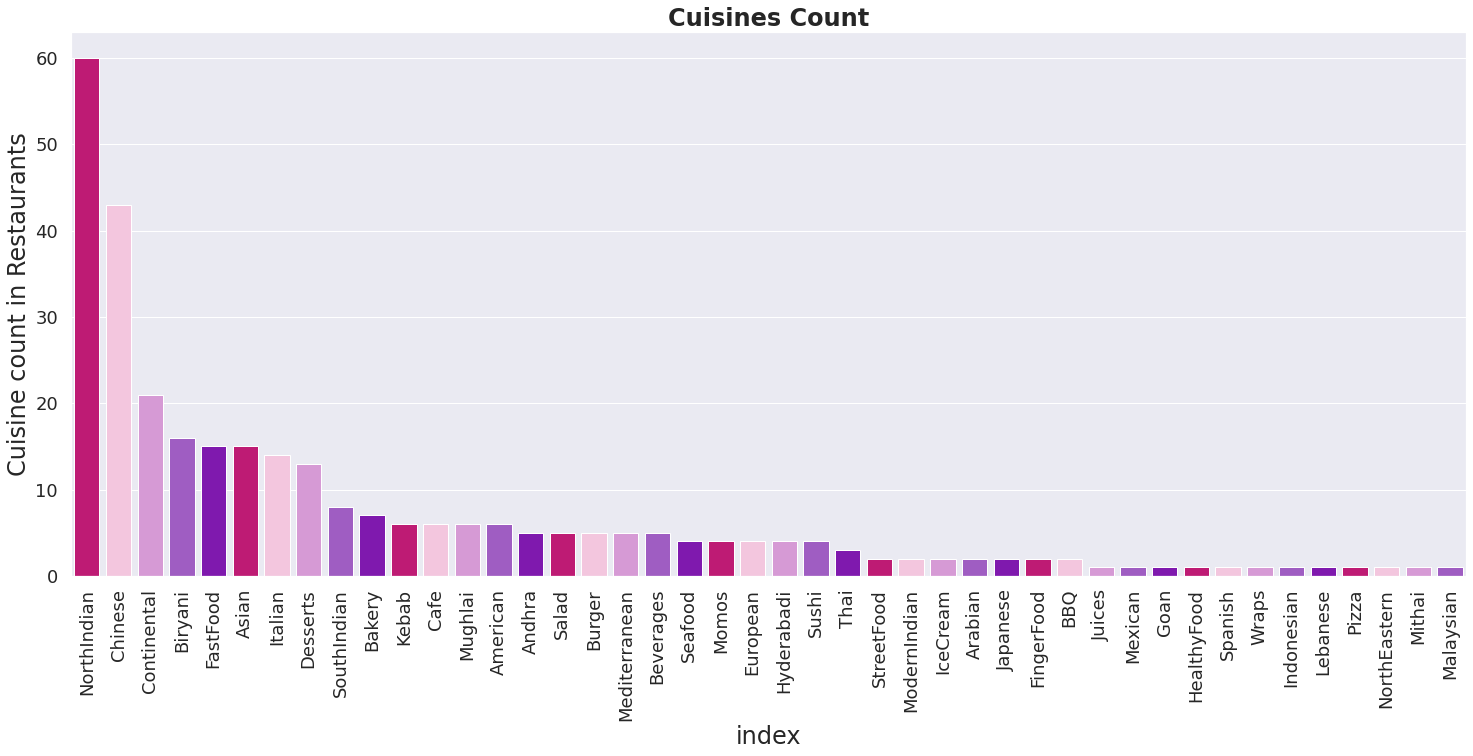

In [17]:
# Visualization of Cuisines Count
plt.figure(figsize = (25, 10))
sns.set(font_scale = 2)
sns.barplot(data = cuis_df,x = cuis_df['index'],y = cuis_df['Cuisine count in Restaurants'],palette=['#D90077','#FBBEDE','#E090DF','#A44CD3','#8800C7'])
plt.title('Cuisines Count',fontweight='bold')
plt.xticks(rotation = 90,fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

chinese, continental, kebab, european, southindian, northindian,biryani, northindian, chines,asian, mediterranean, northindian, dessert,biryani, northindian, chinese, seafood, beverag,asian, continental, northindian, chinese, mediterranean,seafood, goan, northindian, continental, asian,healthyfood, northindian, continental, southindian,lebanes,american, chinese, northindian, kebab, southindian,icecream, dessert,streetfood, northindian, fastfood,mediterranean, northindian, kebab, bbq,continental, american, chines,northindian, italian, fingerfood,european, mediterranean, northindian,burger, fastfood,northindian,chinese, northindian,northindian, chinese, continent,northindian, chinese, biryani,northindian,northindian, japanese, italian, salad, sushi,american,icecream, dessert,northindian, chinese, continent,continent,mexican, italian, northindian, chinese, salad,northindian, mediterranean, european,mughlai, biryani,fastfood,bakery, northindian, mughlai, juices, chines,arabian, northindian

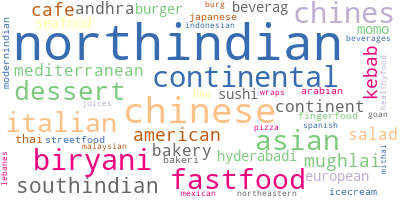

In [18]:
# Visualization of words from 'Cuisines' feature
df_metadata['Cuisines']= df_metadata['Cuisines'].astype(str)

ps = PorterStemmer() 
df_metadata['Cuisines']=df_metadata['Cuisines'].map(lambda x: ps.stem(x))
long_string = ','.join(list(df_metadata['Cuisines'].values))
print(long_string)
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=13,colormap = 'Accent')
wordcloud.generate(long_string)
wordcloud.to_image()

chinese, continental, kebab, european, southindian, northindian,biryani, northindian, chin,asian, mediterranean, northindian, dessert,biryani, northindian, chinese, seafood, beverag,asian, continental, northindian, chinese, mediterranean,seafood, goan, northindian, continental, asian,healthyfood, northindian, continental, southindian,leban,american, chinese, northindian, kebab, southindian,icecream, dessert,streetfood, northindian, fastfood,mediterranean, northindian, kebab, bbq,continental, american, chin,northindian, italian, fingerfood,european, mediterranean, northindian,burger, fastfood,northindian,chinese, northindian,northindian, chinese, contin,northindian, chinese, biryani,northindian,northindian, japanese, italian, salad, sushi,american,icecream, dessert,northindian, chinese, contin,contin,mexican, italian, northindian, chinese, salad,northindian, mediterranean, european,mughlai, biryani,fastfood,bakery, northindian, mughlai, juices, chin,arabian, northindian, chin,northindia

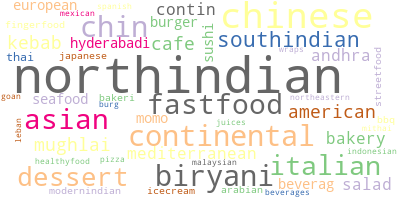

In [19]:
# Visualization of words from 'Cuisines' feature
df_metadata['Cuisines']= df_metadata['Cuisines'].astype(str)

ps = PorterStemmer() 
df_metadata['Cuisines']=df_metadata['Cuisines'].map(lambda x: ps.stem(x))
long_string = ','.join(list(df_metadata['Cuisines'].values))
print(long_string)
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=13,colormap = 'Accent')
wordcloud.generate(long_string)
wordcloud.to_image()

In [20]:
# Number of Unique Restaurant
print('Number of Unique Restaurants:',df_metadata['Name'].nunique())

Number of Unique Restaurants: 104


In [21]:
# 'Cuisine' feature
# Replacing ',' 
df_metadata['Cost'] = df_metadata['Cost'].str.replace(',','')

# Converting 'cost' feature to integer datatype
df_metadata['Cost'] = df_metadata['Cost'].apply(lambda x:int(x))

In [22]:
# Creating DataFrame with Restaurant names and their respective cost
restaurant_cost = pd.DataFrame(df_metadata.groupby('Name').agg({'Cost':'mean'})).reset_index()
restaurant_cost.sort_values(by = 'Cost',ascending = False,inplace= True)
# restaurant_cost.head()


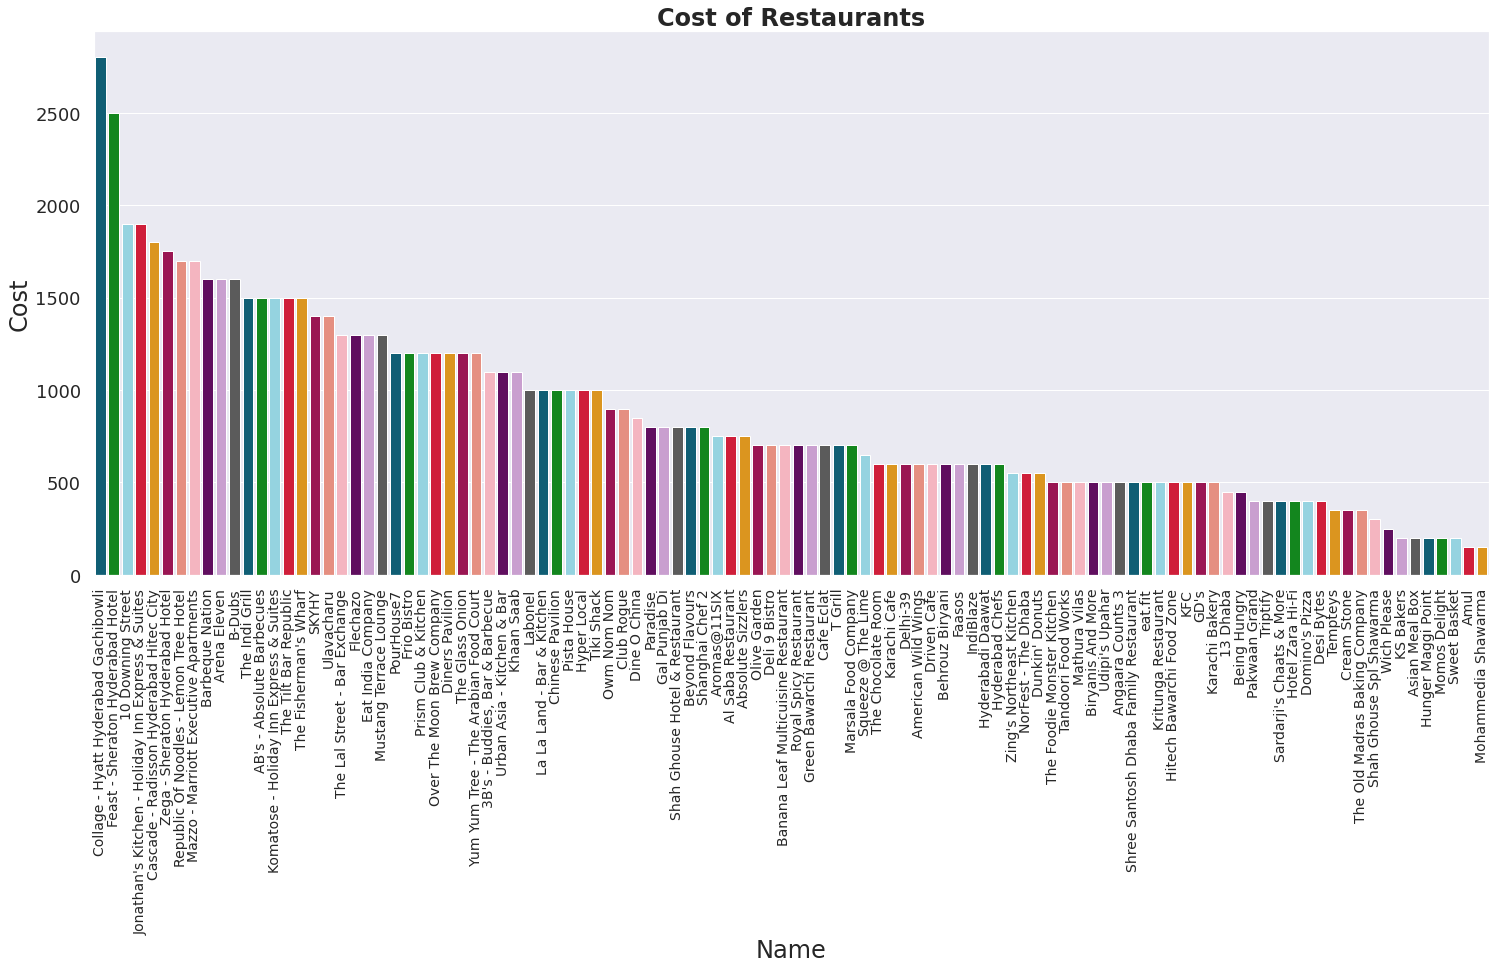

In [23]:
# Visualization of Restaurant names and their respective cost
plt.figure(figsize = (25, 10))
sns.set(font_scale = 2)
sns.barplot(data = restaurant_cost,x = restaurant_cost['Name'],y = restaurant_cost['Cost'],palette=['#006884','#00990E','#89DBEC','#ED0026','#FA9D00','#B00051','#F68370','#FEABB9','#6E006C','#CF97D7','#5B5B5B'])
plt.title('Cost of Restaurants',fontweight='bold')
plt.xticks(rotation = 90,fontsize = 14)
plt.yticks(fontsize = 18)
plt.show()

In [24]:
# Tokenizer
tokenizer = Tokenizer(num_words="MAX_NB_WORDS")
tokenizer.fit_on_texts(df_metadata[['Cuisines','Links','Timings']])

# Functions for Text Preprocessing

In [25]:
#Functions
#Remove non-ascii words
#convert all words to lower case
#Remove punctuation
#Replace numbers 
#Stem words
#Lemmatize verbs
#normalize


def Remove_non_ascii(words) :
   """Remove non-ASCII characters from list of tokenized words"""
   new_words = []
   for word in words :
     new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
     new_words.append(new_word)
   return new_words

def to_lower_case(words) :
   """Convert all characters to lowercase from list of tokenized words"""
   new_words = []
   for word in words :
       new_word = word.lower()
       new_words.append(new_word)
   return new_words 

def remove_punctuation(words) :
  """Remove punctuation from list of tokenized words"""
  new_words = []
  for word in words :
    new_word = re.sub(r'[^\w\s]','',word)
    if new_word != '' :
      new_words.append(new_word)
  return new_words

def replace_numbers(words) :
  """Replace all interger occurrences in list of tokenized words with textual representation"""
  p = inflect.engine()
  new_words = []
  for word in words :
    if word.isdigit() :
      new_word = p.number_to_words(word)
      new_words.append(new_word)
    else :
      new_words.append(word)
  return new_words
  
  def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = Remove_non_ascii(words)
    words = to_lower_case(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    return words

# Applying functions
col_lsts = ['Links','Cuisines','Timings']
for col_lst in col_lsts:
  df_metadata[col_lst] = normalize(df_metadata[col_lst])
  

   

In [26]:
df_metadata.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,chinese continental kebab european southindian...,12noon to 330pm 630pm to 1130pm monsun
1,Paradise,httpswwwzomatocomhyderabadparadisegachibowli,800,biryani northindian chin,11 am to 11 pm
2,Flechazo,httpswwwzomatocomhyderabadflechazogachibowli,1300,asian mediterranean northindian dessert,1130 am to 430 pm 630 pm to 11 pm
3,Shah Ghouse Hotel & Restaurant,httpswwwzomatocomhyderabadshahghousehotelresta...,800,biryani northindian chinese seafood beverag,12 noon to 2 am
4,Over The Moon Brew Company,httpswwwzomatocomhyderabadoverthemoonbrewcompa...,1200,asian continental northindian chinese mediterr...,12noon to 11pm mon tue wed thu sun 12noon to 1...


# Preprocessing the dataset for Clustering models

In [27]:
#using TF-IDF vectorizer to conert our words into numbers for implementing them in the models we create

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_metadata['Cuisines'])

In [28]:
X.shape

(104, 50)

In [29]:
type(X)

scipy.sparse.csr.csr_matrix

In [30]:
#Converting the object to a array
X = X.toarray()

In [31]:
type(X)

numpy.ndarray

# Elbow method to find appropriate 'K' value

In [32]:
# 'k-means++' would initialize the centroids far from each other because intializing the centroids nearby could lead to improper clustering 
#  This algorithm ensures a smarter initialization of the centroids and improves the quality of the clustering.

In [33]:
# Function to find appropriate 'K' value
def KElbowvisualizer(metric):
  model = KMeans(init="k-means++",max_iter=300,random_state=0)
  plt.figure(figsize=(10,5))
  sns.set(font_scale = 1)
  visualizer = KElbowVisualizer(model, k=(2,20),metric= metric, timings= False, locate_elbow= True)
  # plt.title(fontweight='bold')
  # # Fit the data to the visualize
  visualizer.fit(X)  
  visualizer.poof()

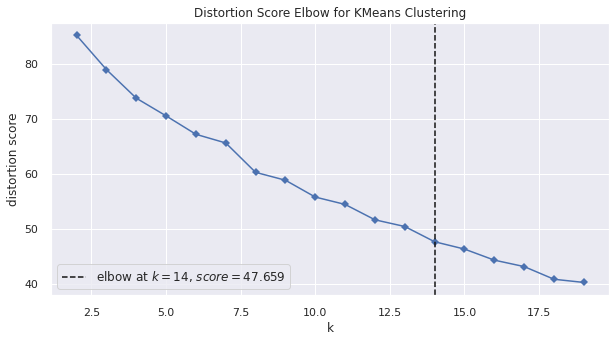

In [34]:
# KElbowvisualizer with metric as 'distortion
KElbowvisualizer('distortion')

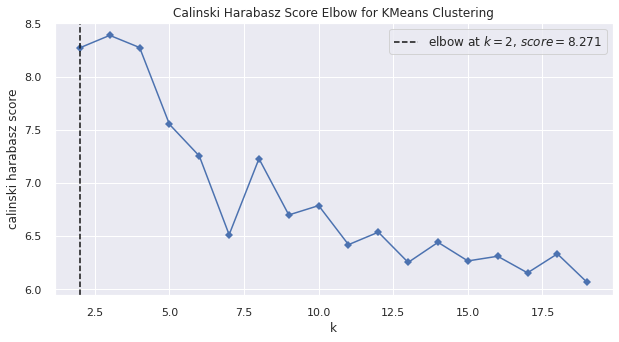

In [35]:
# KElbowvisualizer with metric as 'calinski_harabasz'
KElbowvisualizer('calinski_harabasz')

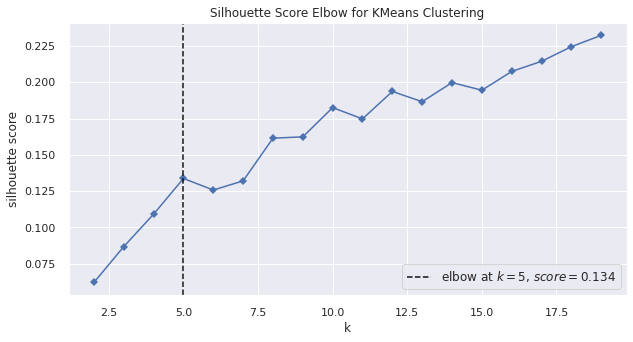

In [36]:
# KElbowvisualizer with metric as 'silhouette'
KElbowvisualizer('silhouette')

# K-Means Clustering

In [37]:
#We tend to figure out the optimum k value for clustering our data which is 14
#so we go with 14 as our k-value

# looks like we can go with 14 clusters.
# Creating an object for K Means clustering
kmeans= KMeans(n_clusters=14, init= 'k-means++',max_iter=300, n_init=1,random_state = 0)

In [38]:
kmeans.fit(X)

KMeans(n_clusters=14, n_init=1, random_state=0)

In [39]:
kmeans.fit_predict(X)

array([ 9,  3,  9, 12,  9,  1,  8,  0,  8,  4,  2,  9,  7,  1,  9,  2, 10,
       12,  5, 12, 10,  1,  7,  4,  5,  5,  1,  9, 12,  2,  4,  3,  2,  1,
       12,  0,  0,  1,  4,  1,  4, 11,  4,  7,  0,  0, 13,  8,  8,  5,  3,
        3,  1,  6, 11,  1,  3, 11, 11,  1,  1,  2, 13,  3, 13, 12, 10,  1,
        6, 13, 10,  4, 11,  4,  8,  7,  1, 10, 12,  7,  3, 12,  7,  0, 13,
        4,  2,  2,  0,  5,  1,  1, 13, 11,  3, 12, 13, 10, 12,  2,  4,  3,
        2, 13], dtype=int32)

In [40]:
Centers_Cluster = kmeans.cluster_centers_


In [41]:
# Testin

X_new= vectorizer.transform([df_metadata['Cuisines'][15]])

y_pred_new= kmeans.predict(X_new)[0]

y_pred_new

2

For n_clusters = 10 The average silhouette_score is : 0.16541792614195844
For n_clusters = 11 The average silhouette_score is : 0.18034697252174647
For n_clusters = 12 The average silhouette_score is : 0.17848649238130113
For n_clusters = 13 The average silhouette_score is : 0.18702918901325458
For n_clusters = 14 The average silhouette_score is : 0.19520733180136957
For n_clusters = 15 The average silhouette_score is : 0.21263038875414814


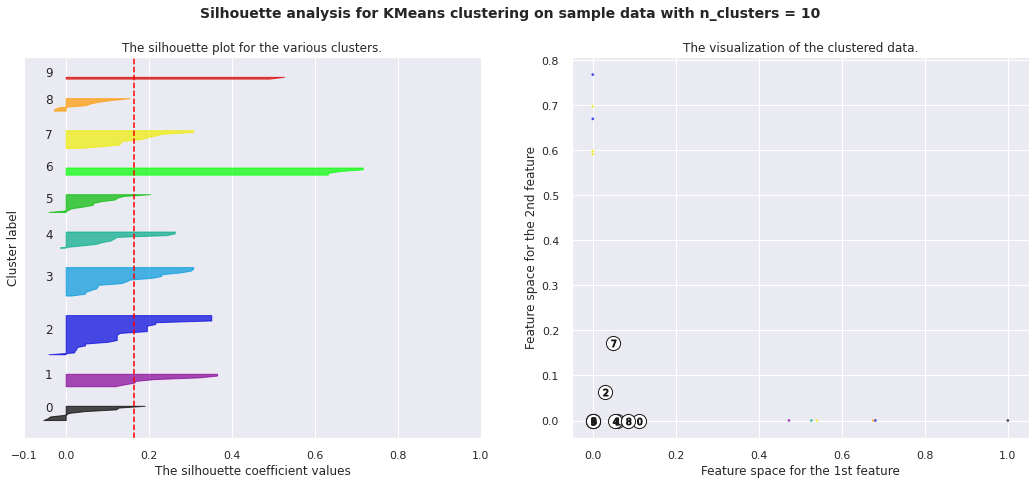

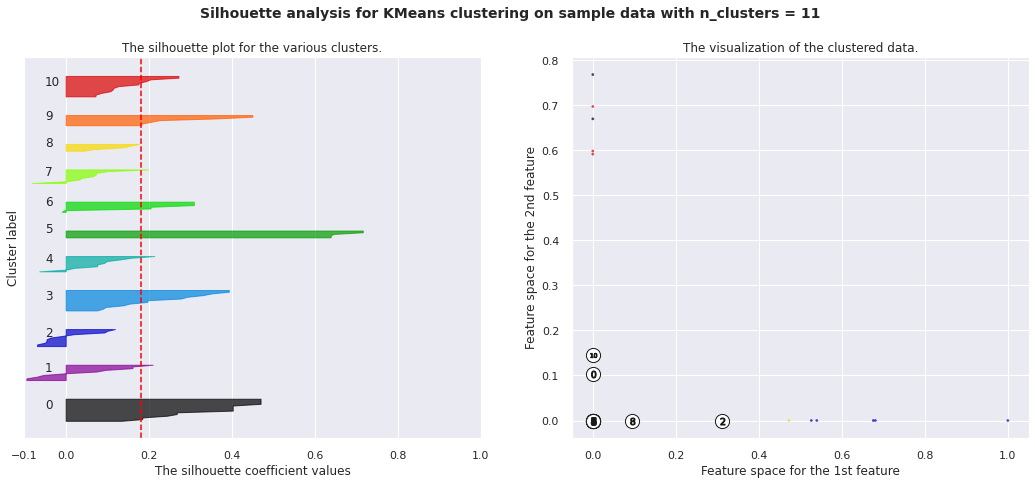

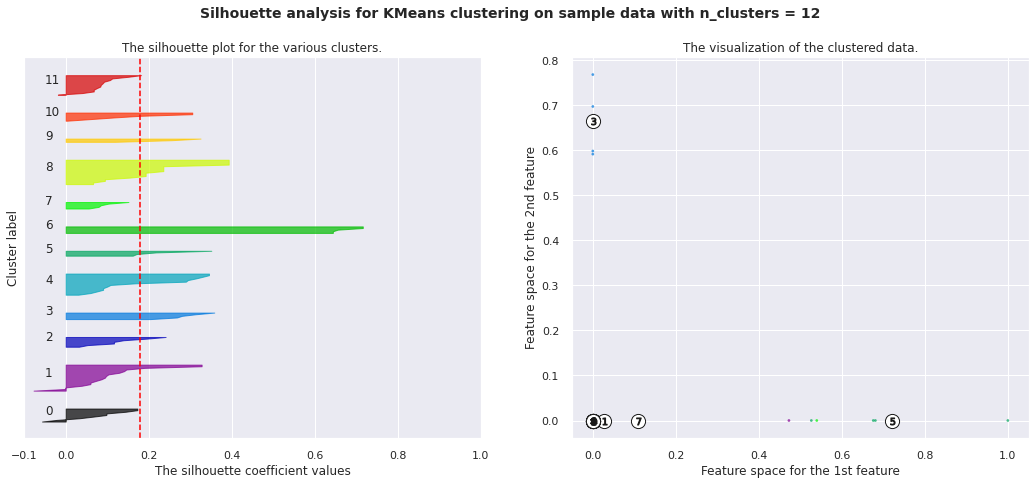

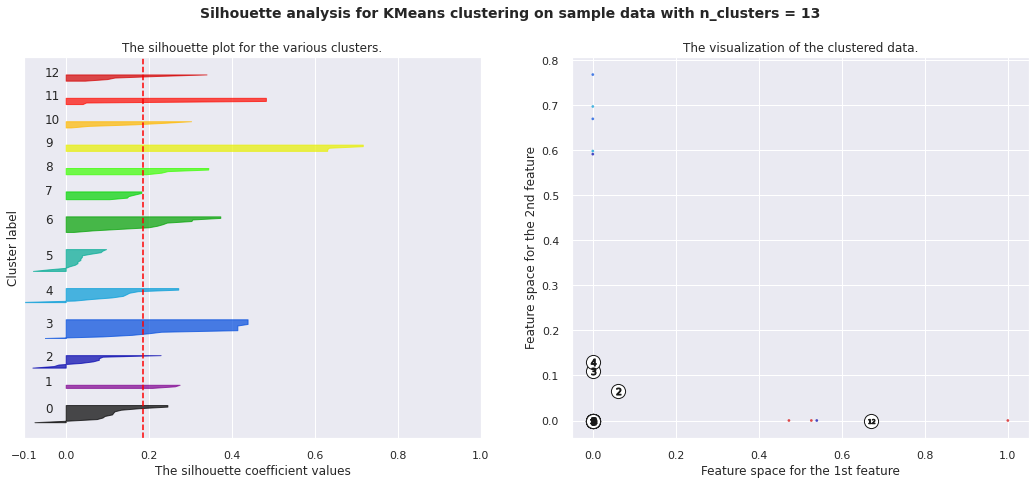

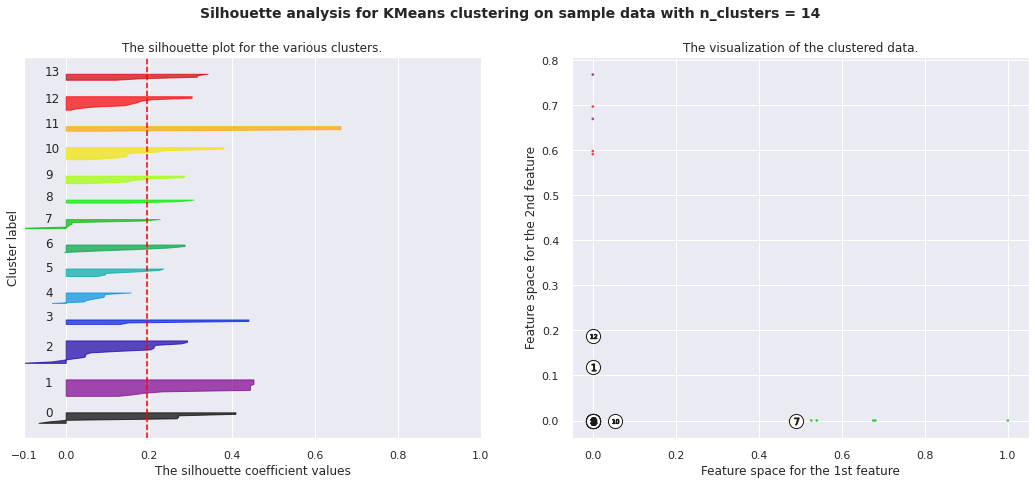

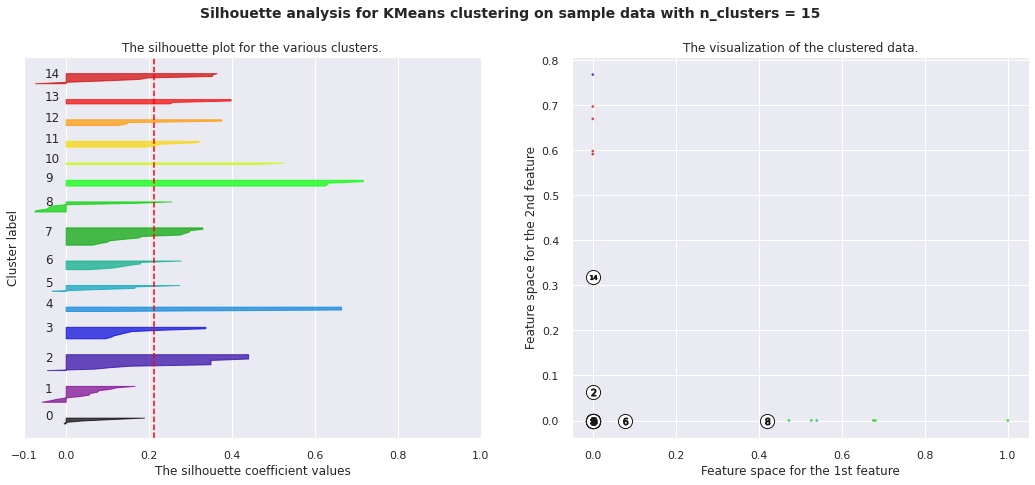

In [42]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [10, 11, 12, 13, 14, 15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()